# Wrangling the Billboard Top 100

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
billboard = pd.read_csv("billboard.csv")
billboard.head()

,Unnamed: 0,url,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart,year,week
0,1,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,1965,29
1,2,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,1965,30
2,3,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,1965,31
3,4,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7,1965,32
4,5,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8,1965,33


## <span style="color:#1F618D">PART A</span>

<span style="color:#1F618D">Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.</span>

<span style="color:#1F618D">Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.</span>

<span style="color:#1F618D">(Note: you'll want to use both performer and song in any group_by operations, to account for the fact that multiple unique songs can share the same title.)</span>

In [3]:
billboard[billboard['year'] > 1958].groupby(['song','performer'])['week_id'].count().reset_index() \
.rename(columns={'week_id':'count'}).sort_values(by='count', ascending = False)[:10]

,song,performer,count
19307,Radioactive,Imagine Dragons,87
20290,Sail,AWOLNATION,79
12007,I'm Yours,Jason Mraz,76
2855,Blinding Lights,The Weeknd,76
10100,How Do I Live,LeAnn Rimes,69
4581,Counting Stars,OneRepublic,68
18525,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,68
20006,Rolling In The Deep,Adele,65
7369,Foolish Games/You Were Meant For Me,Jewel,65
2464,Before He Cheats,Carrie Underwood,64


## <span style="color:#1F618D">PART B</span>

<span style="color:#1F618D">Is the "musical diversity" of the Billboard Top 100 changing over time? Let's find out. We'll measure the musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.</span>

<span style="color:#1F618D">There are number of ways to accomplish the data wrangling here. For example, you could use two distinct sets of data-wrangling steps. The first set of steps would get you a table that counts the number of times that a given song appears on the Top 100 in a given year. The second set of steps operate on the result of the first set of steps; it would count the number of unique songs that appeared on the Top 100 in each year, irrespective of how many times it had appeared.</span>

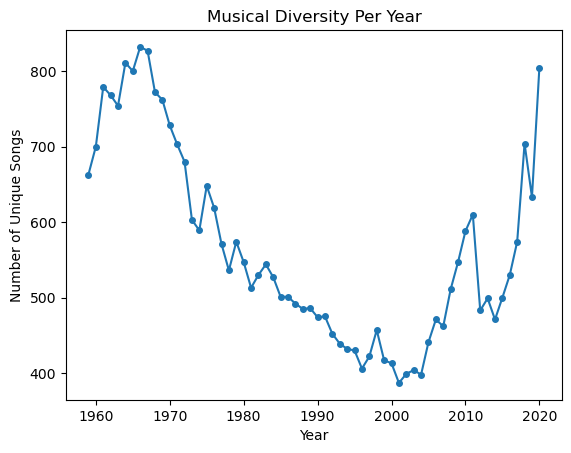

In [4]:
# Compute the musical diversity for each year
musical_diversity = billboard[(billboard['year'] != 1958) & (billboard['year'] != 2021)].groupby('year')['song_id'].nunique()

# Plot the line graph
musical_diversity.plot(kind='line', marker='o', markersize=4)
plt.title('Musical Diversity Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')
plt.show()

## <span style="color:#1F618D">PART C</span>

<span style="color:#1F618D">Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.</span>

<span style="color:#1F618D">Notes: <br>
    1. You might find this easier to accomplish in two distinct sets of data wrangling steps.<br>
    2. Make sure that the individuals names of the artists are readable in your plot, and that they're not all jumbled together. If you find that your plot isn't readable with vertical bars, you can add a coord_flip() layer to your plot to make the bars (and labels) run horizontally instead.<br>
    3. By default a bar plot will order the artists in alphabetical order. This is acceptable to turn in. But if you'd like to order them according to some other variable, you can use the fct_reorder function, described in this blog post. This is optional.</span>

In [5]:
# Get all the "ten-week hits" from the billboard dataset and compute the counts for each artist
song_counts = billboard[billboard['year'] > 1958].groupby(['song','performer'])['week_id'].count().reset_index() \
.rename(columns={'week_id':'count'}).sort_values(by='count', ascending = False)
ten_week_hit_count = song_counts[song_counts['count'] >= 10].groupby('performer')['song'].count().to_frame()

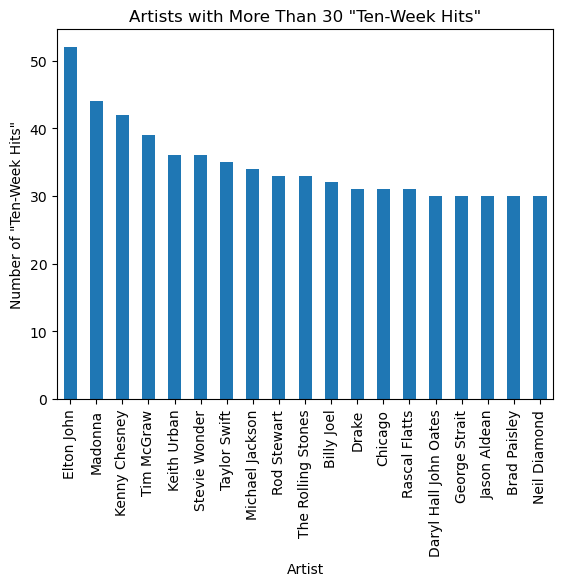

In [6]:
# Get the artists with at least 30 "ten-week hits"
at_least_30 = ten_week_hit_count[ten_week_hit_count['song']>=30].sort_values(by='song', ascending=False)

# Plot the bar graph
at_least_30.plot(kind='bar', legend=False, )
plt.title('Artists with More Than 30 "Ten-Week Hits"')
plt.xlabel('Artist')
plt.ylabel('Number of "Ten-Week Hits"')
plt.show()